In [2]:
from google.colab import files
Files = files.upload()

Saving Graduate Admissions.xlsx to Graduate Admissions.xlsx


In [3]:
import pandas as pd
Data = pd.read_excel('Graduate Admissions.xlsx')

In [4]:
Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
import numpy as np
Q1= np.percentile(Data['Chance of Admit '], 25, interpolation = 'midpoint')
Q3= np.percentile(Data['Chance of Admit '], 75, interpolation = 'midpoint')

IQR = Q3-Q1
UpperLimit = Q3 + 1.5*IQR
LowerLimit = Q1 - 1.5*IQR

<ipython-input-5-2eee82f7df58>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(Data['Chance of Admit '], 25, interpolation = 'midpoint')
<ipython-input-5-2eee82f7df58>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3= np.percentile(Data['Chance of Admit '], 75, interpolation = 'midpoint')


In [6]:
OutlierList = []
for i in range(Data['Chance of Admit '].shape[0]):
    if Data['Chance of Admit '][i] >= UpperLimit:
        OutlierList.append(i)
    elif Data['Chance of Admit '][i] <= LowerLimit:
        OutlierList.append(i)

print(OutlierList)


[92, 376]


In [7]:
Y = Data['Chance of Admit ']
X = Data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]



In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)


In [9]:
import statsmodels.api as sm
MLR=sm.OLS(Y_train,X_train).fit()
print (MLR.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              6407.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:20:44   Log-Likelihood:                          503.34
No. Observations:                 400   AIC:                                     -992.7
Df Residuals:                     393   BIC:                                     -964.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [10]:
Y_pred=MLR.predict(X_test)
Y_pred

361    0.875161
73     0.854174
374    0.521588
155    0.713175
104    0.793526
         ...   
347    0.441165
86     0.680591
75     0.715994
438    0.714512
15     0.638043
Length: 100, dtype: float64

In [11]:
Residual=Y_test-Y_pred
Y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)



LinearRegression()

In [13]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.003704655398788405


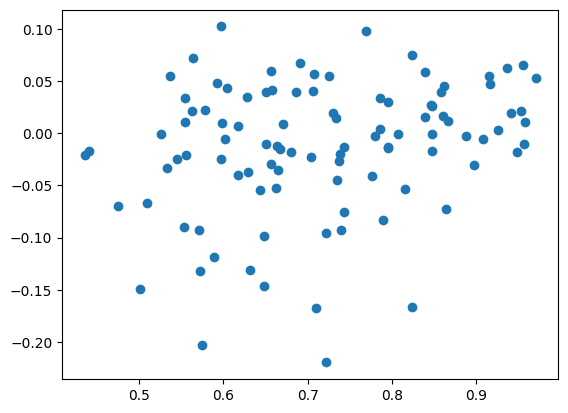

In [14]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred,Residual)

In [15]:
import numpy as np
import pylab as py

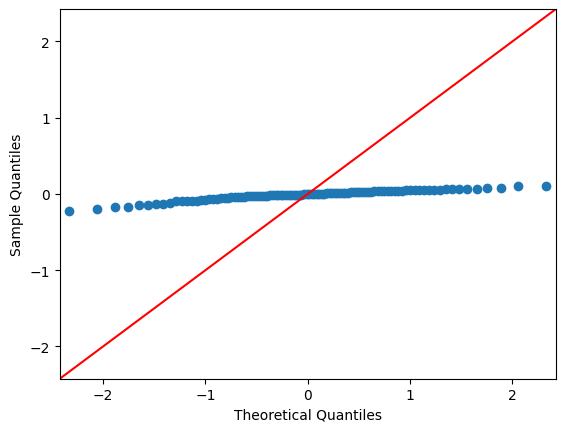

In [16]:
sm.qqplot(Residual, line ='45')
py.show()

In [17]:
X.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


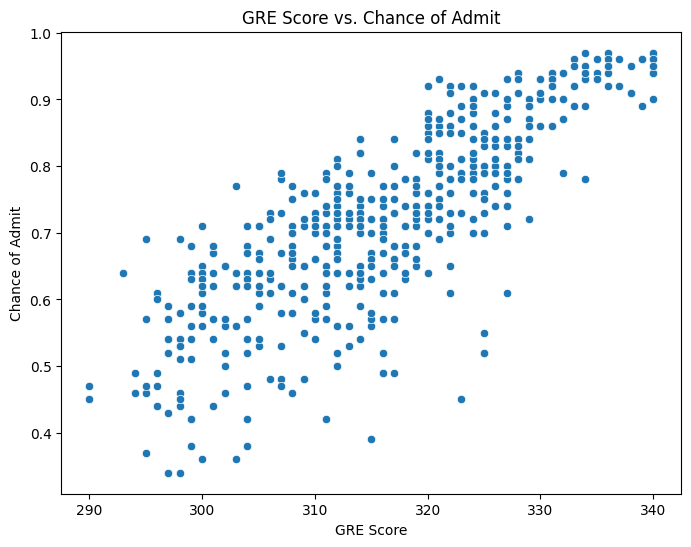

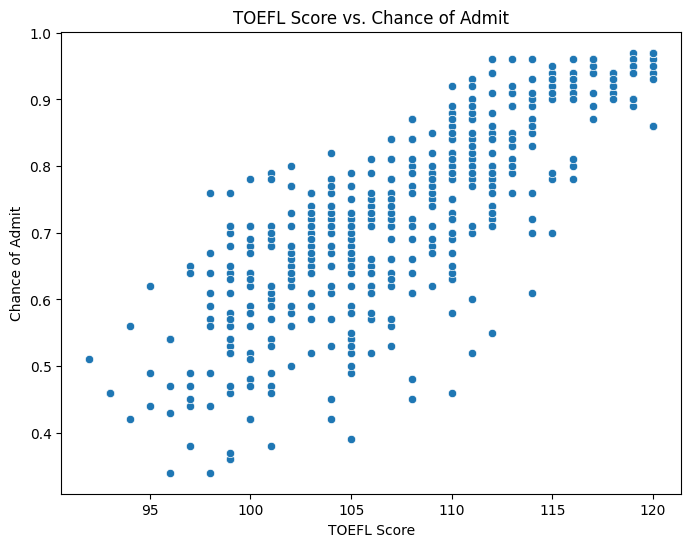

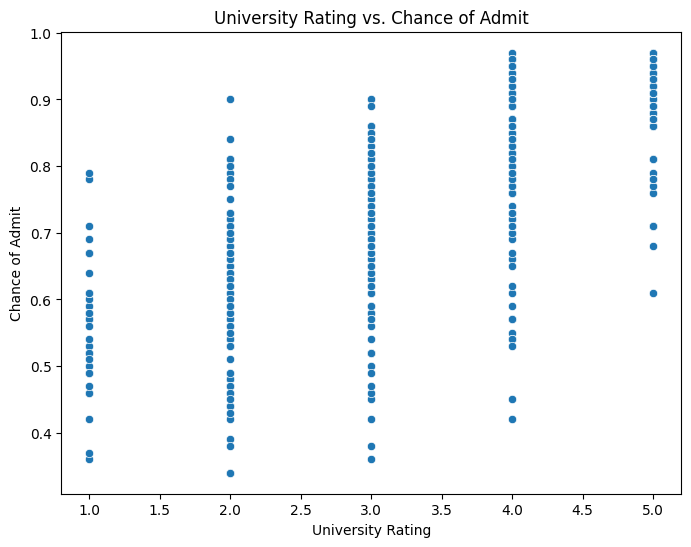

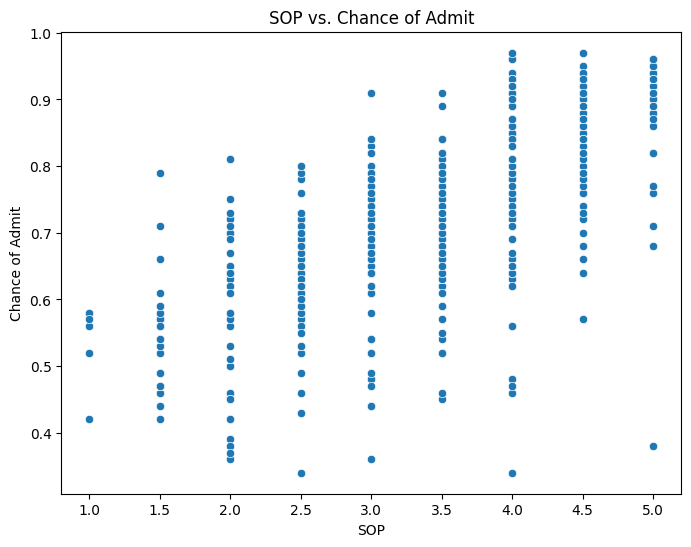

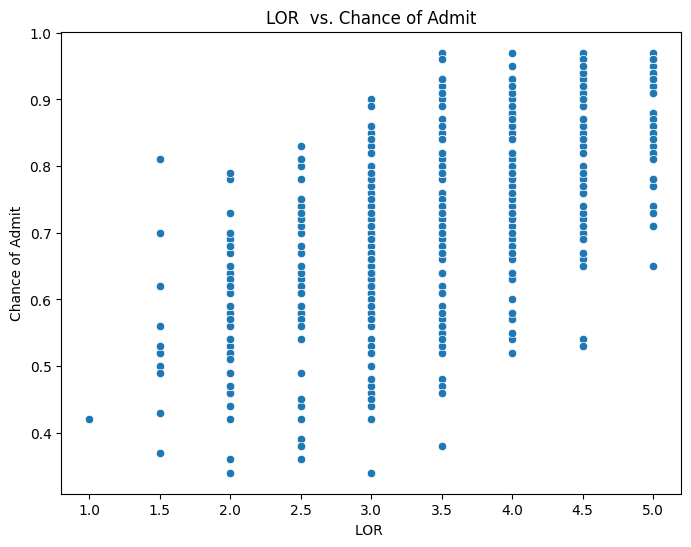

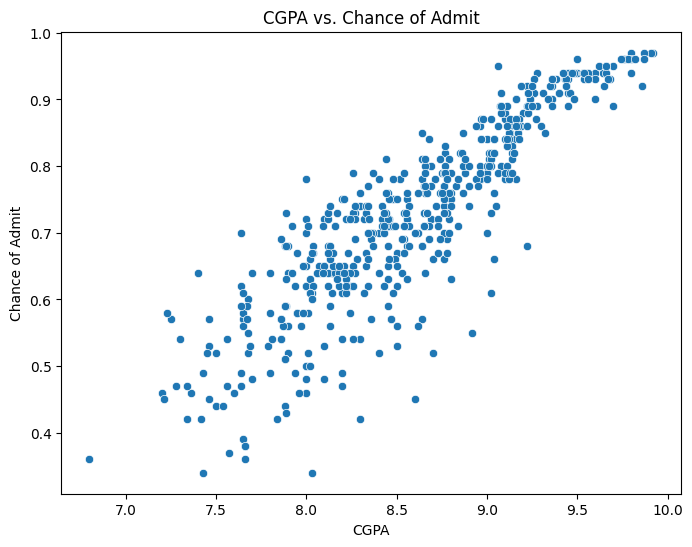

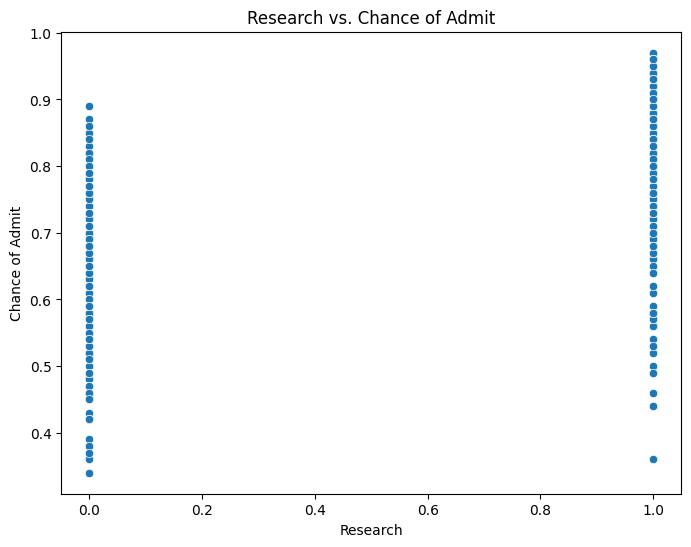

In [21]:
for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=Data, x=variable, y=Data['Chance of Admit '])
    plt.title(f'{variable} vs. Chance of Admit')
    plt.xlabel(variable)
    plt.ylabel('Chance of Admit')
    plt.show()

In [20]:
independent_variables = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [23]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

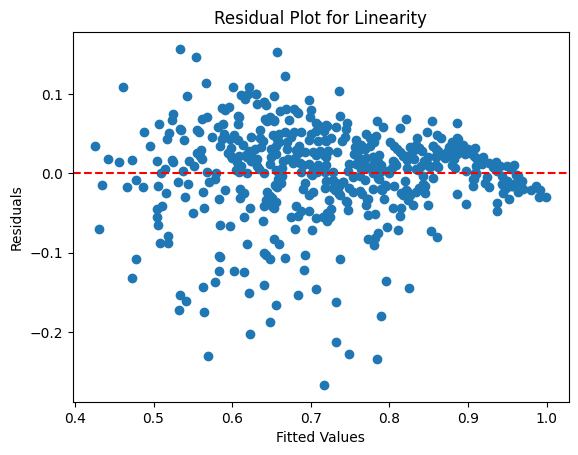

In [24]:
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linearity")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

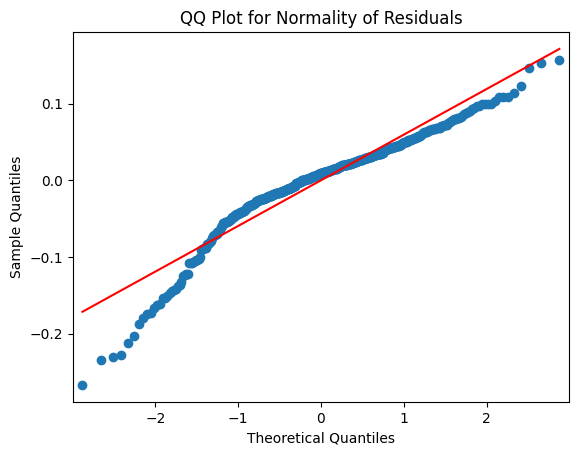

In [25]:
sm.qqplot(residuals, line='s')
plt.title("QQ Plot for Normality of Residuals")
plt.show()

In [26]:
rainbow_statistic, rainbow_p_value = sm.stats.linear_rainbow(model)
print(f"Rainbow Statistic: {rainbow_statistic}")
print(f"P-value: {rainbow_p_value}")
if rainbow_p_value < 0.05:
    print("No significant evidence of non-linearity.")
else:
    print("Evidence of non-linearity.")


Rainbow Statistic: 3.2277972215876836
P-value: 2.5920771553378296e-19
No significant evidence of non-linearity.


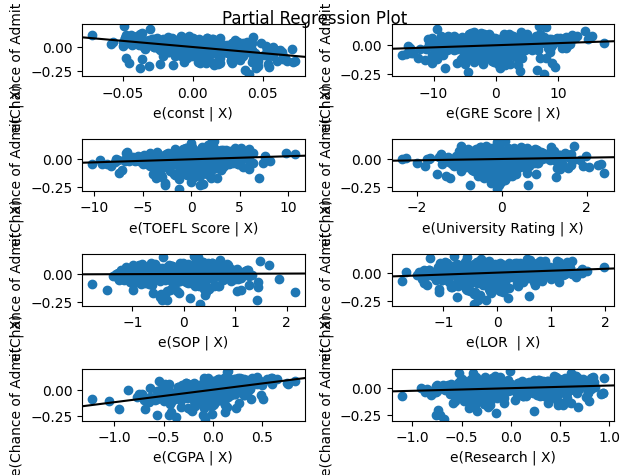

In [27]:
fig = sm.graphics.plot_partregress_grid(model)
plt.show()

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

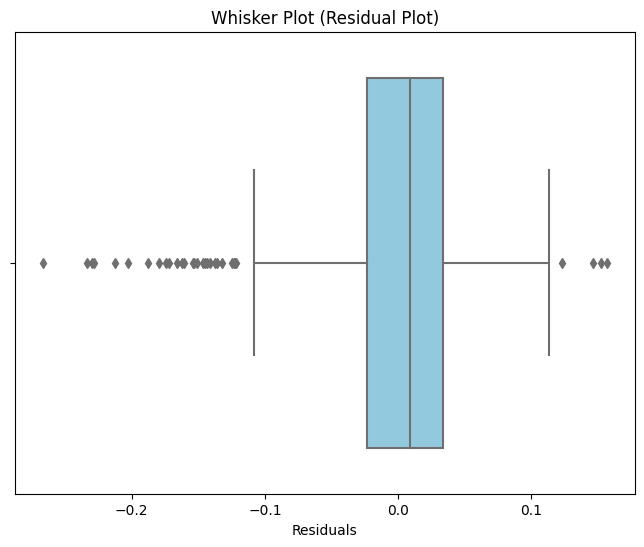

In [29]:
residuals = model.resid
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals, orient="h", color="skyblue")
plt.xlabel("Residuals")
plt.title("Whisker Plot (Residual Plot)")
plt.show()

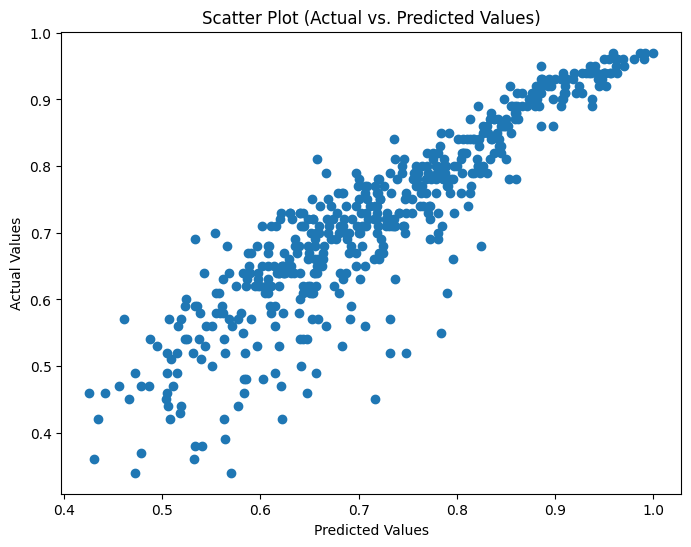

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, Y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Scatter Plot (Actual vs. Predicted Values)")
plt.show()

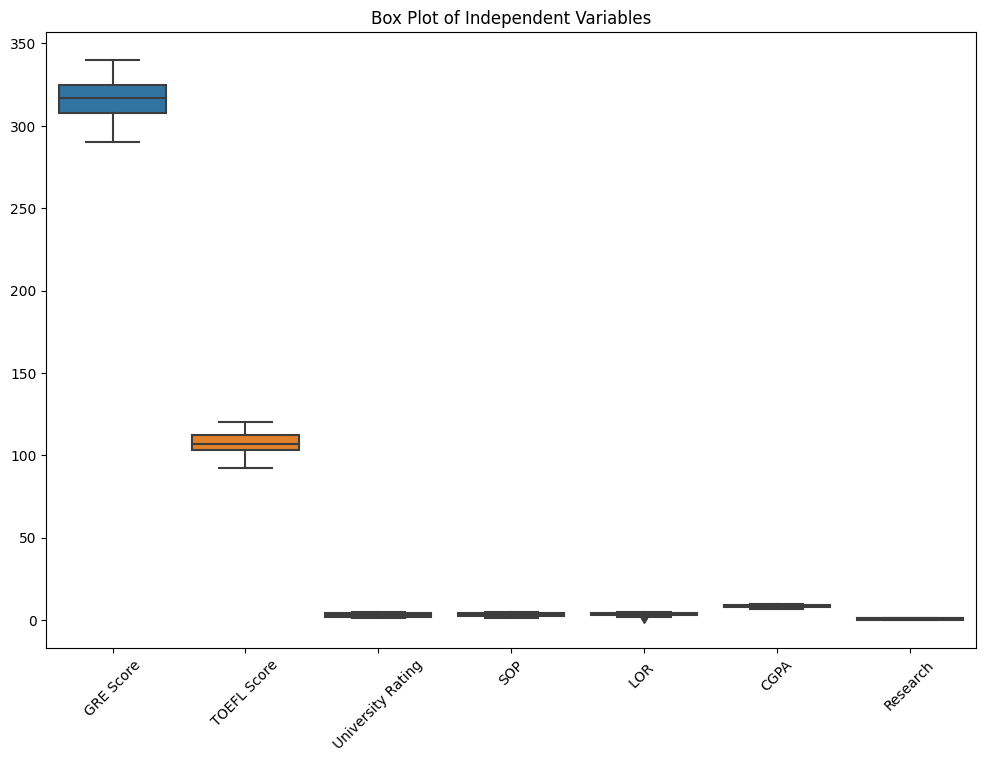

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X.iloc[:, 1:], orient="v")  # Exclude the constant term
plt.xticks(rotation=45)
plt.title("Box Plot of Independent Variables")
plt.show()

In [33]:
na_values = Data.isna()

na_values

data= Data.dropna()

data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [34]:
Data = data.drop_duplicates()

Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


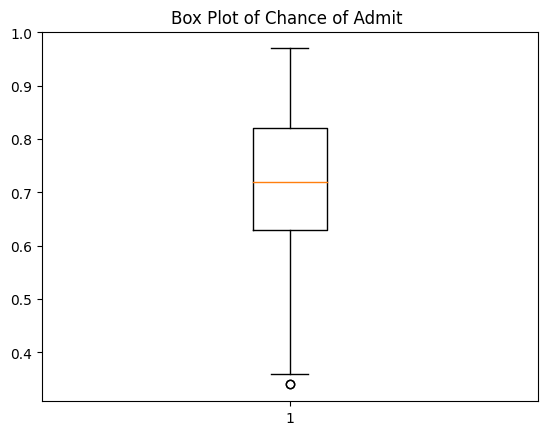

In [35]:
plt.boxplot(Data["Chance of Admit "])
plt.title('Box Plot of Chance of Admit ')
plt.show()

In [36]:
datadf = Data.drop(OutlierList)
datadf

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [37]:
findata = datadf.reset_index()
findata

,index,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...,...
493,495,496,332,108,5,4.5,4.0,9.02,1,0.87
494,496,497,337,117,5,5.0,5.0,9.87,1,0.96
495,497,498,330,120,5,4.5,5.0,9.56,1,0.93
496,498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [39]:
np.random.seed(0)
data = pd.DataFrame({
    'GRE Score': np.random.rand(100) * 100,
    'TOEFL Score': np.random.rand(100) * 120,
    'LOR': np.random.rand(100) * 5,
    'SOP': np.random.rand(100) * 5,
    'University Rating': np.random.randint(1, 6, size=100),
    'Research': np.random.randint(0, 2, size=100),
    'CGPA': np.random.rand(100) * 10,
    'Chance of Admit': np.random.rand(100)
})

In [40]:
X = sm.add_constant(data[['GRE Score', 'TOEFL Score', 'LOR', 'SOP', 'University Rating', 'Research', 'CGPA']])
model = sm.OLS(data['Chance of Admit'], X).fit()


In [41]:
_, p_value, _, _ = het_breuschpagan(model.resid, X)
print(f"P-value for Breusch-Pagan test: {p_value}")

P-value for Breusch-Pagan test: 0.35270935568321016


In [42]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence of heteroskedasticity.")
else:
    print("Fail to reject the null hypothesis: There is no evidence of heteroskedasticity.")

Fail to reject the null hypothesis: There is no evidence of heteroskedasticity.
